1:
Standard deviation is a measure of how much data varries by. High standard deviation is indicitive of polarizing data, and it tends to go down with higher sample size, but not always. 
On the other hand, standard error of the mean measures how much the mean changes among bootsrapped data. High standard error indicates that the initial data lacks some precision, this could either be because of polarizing data or because of a small sample size. 
They both measure simmilar things, and go down with large sample sizes or less variability in data, and in general being high in one means being high in the other is likely. That being said, fundamentally they measure different things, and are more applicable in different situations. It's almost like standard error of mean is measuring something proportional to what the standard deviation would be in a massive sample size. 

2:
1.96 times sample error of mean in either direction of the mean of means.

3:
You could just take the sample means and cut off the bottom and top 2.5% of results. Using np.quantile, you would just take 1 section that is 95% likely to occur

5:
The sample statistic isn't completely accurate to the population parameter, and as the poulation parameter is unfeasable to get most of the time, the sample statistic is our only option. 

6:
1.  Bootstrapping is basically taking data and picking random data points with duplicates, you then take the average or median or some other stat of your random data points. If you do this enough and graph the results it'll give you a pretty good idea of what the stat would have been if you had more data, which means it's used to save a lot of time and money gathering info. 
2. Bootstrapping saves a lot of time getting data. If you only gather a little bit of info there's a real chance that it'll be super far from normal, like if you gather the height of people but only ask NBA players. Bootstrapping is a way to try to save that data, and though it's not perfect you can get boostrapping to give you an range of values that would almost always be right. 
3.  Pick random values from the data with duplicates allowed, take the average, then do that like 1000ish times, should be pretty easy, no? Yeah, you kinda need code to do bootstrapping properly cause it would take way too long to do by hand. Once you have the 1000 averages though, you just graph them and get rid of the 25 lowest and 25 highest. If what you guessed would be between the highest and lowest points you have then it's a good guess. 

7:
If 0 correlation is in your confidence interval then there is a decent chance that if you actually sampled the population then the drug would do nothing on average. If all the averages were positive, that means it's pretty much guarantee that if the inital sample was decent then the drug is actually helpful. Funnily enough if the drug was extremely bad for people that would say the same thing as if it were helpful. A null hypothesis is just the idea that nothing is happening, both bad and good happening rejects the idea that nothing is happening, but it still might not be helpful.   

Question 8 is below


Summaries:
1. Difference Between SEM and SD:
 - Standard Deviation (SD) measures the spread of individual data points in a dataset.
 - Standard Error of the Mean (SEM) measures the precision of the sample mean as an estimate of the population mean.
2. High SEM:
 - A high SEM indicates less precision in estimating the population mean, often due to high variability in the data or a small sample size. It doesn’t necessarily mean the data is inaccurate.
3. Creating a 95% Confidence Interval:
 - We discussed how to use the SEM to create a 95% confidence interval for the population mean. The steps include calculating the sample mean, SEM, margin of error, and then constructing the interval.
1. Confidence Intervals: We discussed the importance of distinguishing between population parameters and sample statistics when working with confidence intervals. This distinction helps in understanding estimation accuracy, making inferences, and ensuring statistical validity.
2. Graph Readability: You shared some code to create a histogram using Plotly. I suggested improvements to make the graph more readable, including reshaping the data, adding color differentiation, overlaying bars, adjusting bin size, and updating the layout.
3. Error Troubleshooting: You encountered a ValueError: No axis named 2 for object type DataFrame. I explained that this error occurs when an invalid axis value is used in a DataFrame operation and provided guidance on using the correct axis values.

In [53]:
import numpy as np
#Different options for what to track, there are probably more that I missed.
def mean(data):
    return sum(data)/len(data)

def median(data):
    temp = sorted(data)
    middle = int(len(temp)//2)
    if len(temp)%2 == 1:
        return temp[middle +1]
    else:
        return (temp[middle] + temp[middle +1]) /2
    
def stdDeviation(data):
    return np.std(data)

sample = (1,29,3,40,5,7,26,19,14,15,16,33,10,36) #Just random numbers, could be anything continuous
finalData = []

for _ in range(1000):
    bootstrap = []
    for i in range(len(sample)):
        bootstrap.append(np.random.choice(sample))
        
    dPoint = mean(bootstrap) #Change this function to bootstrap using different parameters
    #it runs faster if you copy paste the code inside the function into the loop instead of calling the function
    finalData.append(dPoint)

finalData.sort() #There was a faster way to do this using binary search, but I'm lazy

num_points = len(finalData) * 0.95
dist = int(num_points//2)
middle = int(len(finalData)//2)
out = finalData[middle-dist:middle+dist]
#print(out)

Vaccine testing assignment:   

Small tests have been run on a vaccine and it's our job to figure out whether the vaccine is effective or not. There are two outcomes, both surrounding the 'null hypothesis', the idea that the vaccine has no effect. One case is that the null hypothesis is rejected and our data shows that the vaccine has some effect. The other case is that we fail to reject the null hypothesis, essentially meaning having no change is a likely outcome in our data, or that the drug has 'no effect'. To figure out which case our data states we will use bootstrapping to expand on our small sample size.   

For an initial visualization of what our dataset, this is what the values are looking like:

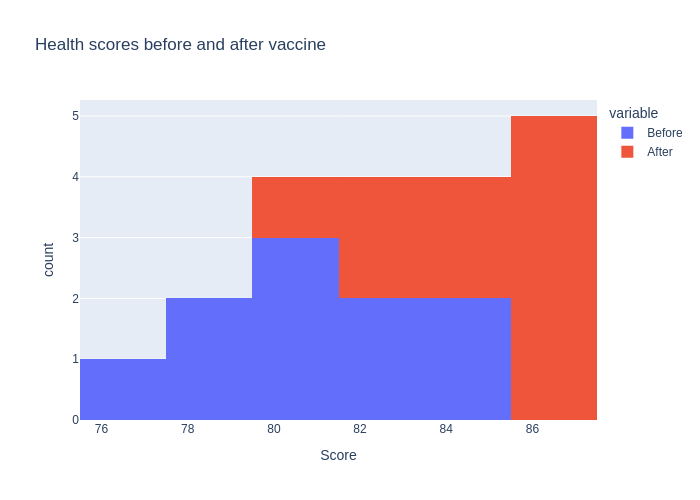

In [51]:
import pandas as pd
import plotly.express as px
import numpy as np

#Not loaded in a csv file, because I couldn't get the file path to register
data = {'PatientID' : [1,2,3,4,5,6,7,8,9,10],
        'Age' : [45,34,29,52,37,41,33,48,26,39],
        'Gender' : ['M','F','M','F','M','F','M','F','M','F'],
        'InitialHealthScore' : [84,78,83,81,81,80,79,85,76,83],
        'FinalHealthScore' : [86,86,80,86,84,86,86,82,83,84]}
df = pd.DataFrame(data)

#I also tried a scatter plot, but it looked bad with so few points
fig = px.histogram(df,x=['InitialHealthScore','FinalHealthScore'], title='Health scores before and after vaccine')
fig.update_layout(xaxis_title = 'Score')
fig.data[0].name = 'Before'
fig.data[1].name = 'After'

fig.show(renderer='png')

To analyze whether our vaccine rejects the null hypothesis or not, a sample size of ten people by itself is not enough for the conclusion to be generally applicable. Luckily, with bootstrapping we can estimate whether there is a resonable chance that the average change in health score is 0, and thus test our null hypothesis. Bootstrapping is simple to make, and resonably accurate so it is a good method for our purposes.

In [49]:
from statistics import median 

np.random.seed(45)
averages = []

for _ in range(1000):
    #Only keeping track of the sum of diffrences because all we need is mean
    total = 0
    for i in range(len(df)):
        #Picks a person and finds the difference in their HealthScore before and after the trial
        person = np.random.choice(range(10))
        total +=  df.at[person,'FinalHealthScore'] - df.at[person,'InitialHealthScore']
    averages.append(total/len(df))

#Used to find +/- 2 std_dev from median, aka 95% certainty range
median = median(averages)
std = np.std(averages)

fig = px.histogram(averages, nbins=20, title='Mean change in health score across bootstrapped trials')
fig.add_vrect(x0=median-2*std, x1=median+2*std, fillcolor = 'blue', opacity = 0.2, line_width=1, annotation_text='95%', annotation_position='top left')
fig.update_layout(xaxis_title = 'Change in Score', showlegend = False)
fig.show(rendered='png')

Because an average increace in health score of 0 was outside of our 95% certainty range, it is safe to assume that our null hypothesis has been rejected. While the average change was relatively low, it was still postive as well, which is a good sign for the effectiveness of the vaccine. This data may not be accurate if the inital sample was biased. More testing on people of different demographics, and obtaining a higher sample size in general would help with the accuracy of any predicted score.